<a href="https://colab.research.google.com/github/namudongs/DAP__2022/blob/main/Lecture10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In contrast to *supervised* machine learning, *unsupervised* learning is used when there is no "ground truth" from which to train and validate label predictions.

The most common form of unsupervised learning is *clustering*, which is simllar conceptually to *classification*, except that the the training data does not include known values for the class label to be predicted.

Clustering works by separating the training cases based on similarities that can be determined from their feature values.

## Seed dataset
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes, and can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml).

In [ ]:
import pandas as pd

# load the training dataset
data = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/ml-basics/master/data/seeds.csv')

data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
data

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


## Visualization - Scatter Plot

As you can see, the dataset contains six data points (or *features*) for each instance (*observation*) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot. We should take advantage of a dimensionality reduction technique, however we did not cover yet.

Alternatively, we just chose choose two variable (`area`, `groove_length`) visualize the data.

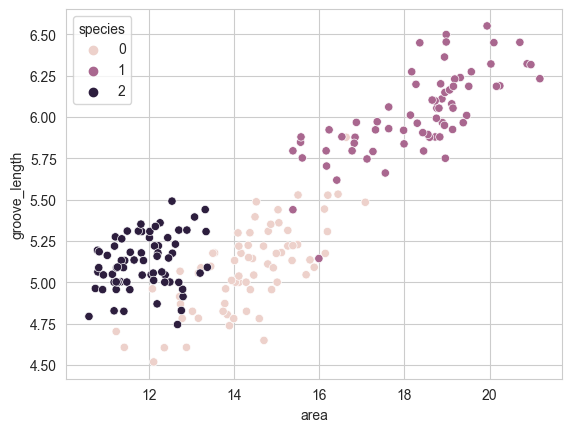

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.scatterplot(x='area', y='groove_length', data=data, hue='species')
plt.show()

## Set up DataFrame
Drop `species` values from DataFrame

In [ ]:
X = data.drop(columns='species')
X.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


## How many clusters?

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the `within cluster sum of squares` (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

$WCSS = \sum_{j=1}^k\sum_{i}^n\mathrm{dist}(x_i, C_j)^2$

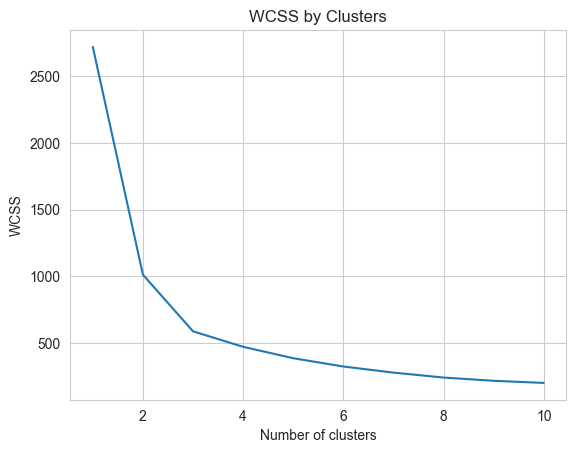

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

## K-Means Clustering

The algorithm we used to create our test clusters is *K-Means*. This is a commonly used clustering algorithm that separates a dataset into *K* clusters of equal variance. The number of clusters, *K*, is user defined. The basic algorithm has the following steps:

**[TODO]** Let's try using K-Means on our seeds data with a `K` value of 3 with `random_state=0`.

In [ ]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, random_state=0)

# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(X)

# Assign the cluster
X_withCluster = X.copy()
X_withCluster['km_clusters'] = km_clusters

## Hierarchical Clustering

Hierarchical clustering methods make fewer distributional assumptions when compared to K-means methods. However, K-means methods are generally more scalable, sometimes very much so.

### Agglomerative Nesting (AGNES) Clustering 
**[TODO]** Let's try using AGNES on our seeds data with a `average` linkage.


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3, linkage='average')
agg_clusters = agg_model.fit_predict(X)

X_withCluster['agg_clusters'] = agg_clusters

## Visulize the Clustering Results

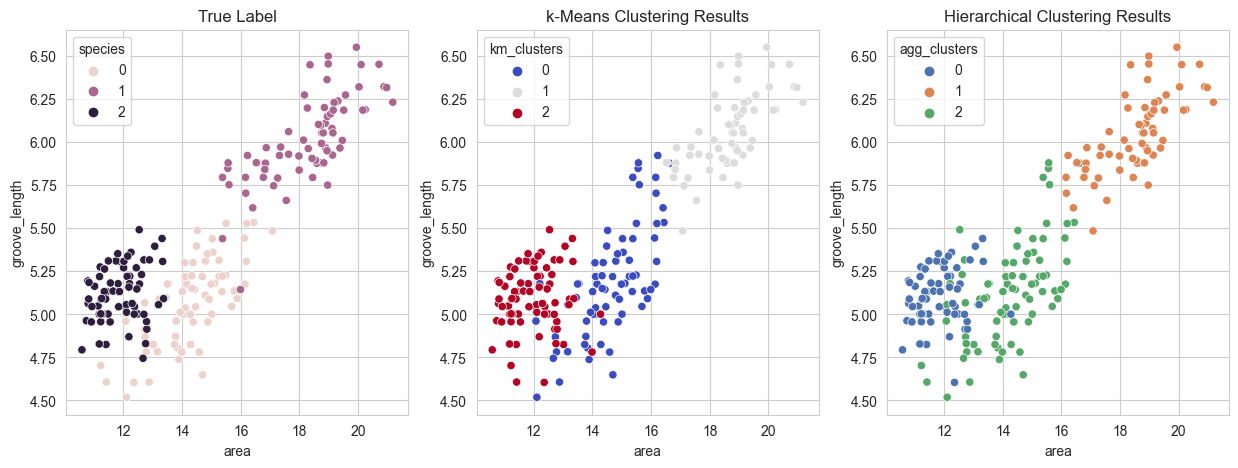

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(x='area', y='groove_length', data=data, hue='species',
           ax=ax[0])
sns.scatterplot(x='area', y='groove_length', data=X_withCluster, hue='km_clusters',
           palette='coolwarm', ax=ax[1])
sns.scatterplot(x='area', y='groove_length', data=X_withCluster, hue='agg_clusters',
           palette='deep', ax=ax[2])
ax[0].set(title='True Label')
ax[1].set(title='k-Means Clustering Results')
ax[2].set(title='Hierarchical Clustering Results')

plt.show()

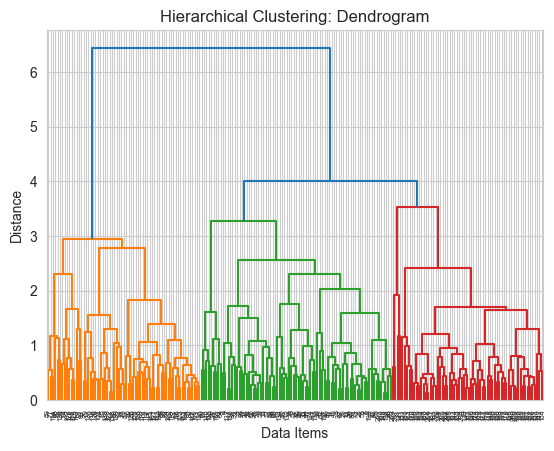

In [ ]:
# Import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# create dendrogram using ward linkage
dendrogram(linkage(X.values, method='average'), color_threshold=4)

# Set title of the plot
plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Data Items')
plt.ylabel('Distance')
plt.show()

# Evaluation

**[TODO]** Internal Evaluation with `Silhouette Score`

In [ ]:
from sklearn.metrics import silhouette_score

print('silhouette of kMeans: %f'%silhouette_score(X.values, km_clusters))
print('silhouette of Hierarchical Clustering: %f'%silhouette_score(X.values, km_clusters))

NameError: name 'X' is not defined

**[TODO]** External Evaluation with `F1 Score`

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

target = data.species
print('kMeans')
print(classification_report(target, km_clusters))

_agg_clusters = agg_clusters.copy()
_agg_clusters[agg_clusters==0]=2
_agg_clusters[agg_clusters==2]=0

print('Hierarchical Clustering')
print(classification_report(target, _agg_clusters))

kMeans
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        70
           1       0.98      0.86      0.92        70
           2       0.88      0.97      0.93        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210

Hierarchical Clustering
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        70
           1       0.98      0.91      0.95        70
           2       0.95      0.87      0.91        70

    accuracy                           0.91       210
   macro avg       0.92      0.91      0.91       210
weighted avg       0.92      0.91      0.91       210



# [TODO]

## 이번 과제는 라이브 셀링에 관한 데이터입니다!

라이브 셀러(책, '라이브 커머스, 셀링의 기술' 참조)란?

[우리는 알게 모르게 이미 물건을 팔고 있다. 내가 산 전자제품이 마음에 들면 블로그에 자발적 후기를 올리고, 배달 음식을 시켜 먹어도 사진을 찍고 전문가 수준으로 맛을 표현해가며 앱에 평가를 적는다. 책을 읽고 리뷰를 써서 SNS에 공유하고, 캠핑을 다녀와서 그곳이 얼마나 아름다웠는지 사진으로 열변을 토한다. 내 리뷰를 보고 누군가 그 음식을 시켜먹었다면, 내가 찍은 사진을 보고 그 캠핑장을 방문했다면 여러분은 이미 셀러로서의 능력을 충분히 갖춘 셈이다. 

사람들은 이제 광고에 쉽게 넘어가지 않는다. 지인들의 평가, 직접 찍은 사진과 함께 공들여 쓴 자세한 리뷰, 평소에 팔로우하던 인플루언서의 소개를 보고 물건을 구매한 지 오래다.]

이 데이터에 속성들은 share를 얼마나했는지 comment를 얼마나 달았는지, link나 video, photo등에 대해서 어떤 감정표현을 남겼는지 나타내준다.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wonseok-hong/DAP_TA/main/Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 데이터 전처리
- Clustering은 Unsupervise Learning으로 정답값이 없이 결과를 도출해 내야 합니다!
- mapping을 통한 라벨링이나 drop등을 이용하여 자유롭게 전처리 해주세요!


In [ ]:
X = df.drop(columns=['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'])
X_map = X.status_type.map({'video' : 0, 'photo' : 1, 'link' : 2, 'status' : 3})
X['status_type'] = X_map
X

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


## Elbow analysis with K-MEANS

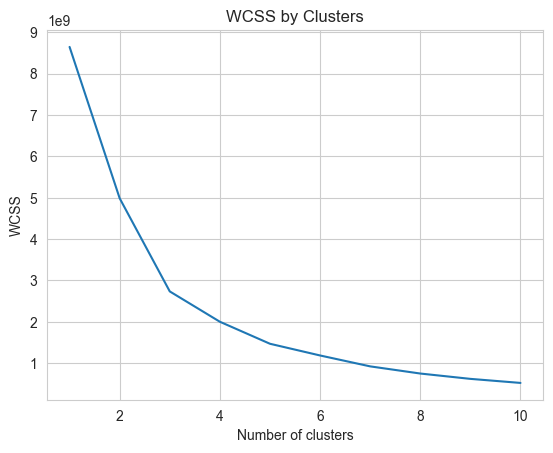

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K-means or Any other Clustering Methods

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0) 

num_clusters= km.fit_predict(X)

### Silhouette Coefficient값 및 accuracy 값

In [ ]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient:", silhouette_score(X.values, num_clusters))

Silhouette Coefficient: 0.8121398224316847


## 채점 기준

- Silhouette Coefficient 점수가 89 이상: 100점(만점)
- Silhouette Coefficient 점수가 85 이상, 89미만: 90점
- Silhouette Coefficient 점수가 80 이상, 85미만: 80점
- Silhouette Coefficient 점수가 80미만: 70점
